In [1]:
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings('ignore')

# Regressors

In [2]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('catfood_prepared.csv')

# Show general information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            121 non-null    float64
 1   weight           121 non-null    float64
 2   star_rating      121 non-null    float64
 3   total_comments   121 non-null    float64
 4   adult            121 non-null    float64
 5   chicken          121 non-null    float64
 6   wet              121 non-null    float64
 7   from_ocean       121 non-null    float64
 8   company_farmina  121 non-null    int64  
 9   company_me-o     121 non-null    int64  
 10  company_meat     121 non-null    int64  
 11  company_purepet  121 non-null    int64  
 12  company_purina   121 non-null    int64  
 13  company_royal    121 non-null    int64  
 14  company_sheba    121 non-null    int64  
 15  company_whiskas  121 non-null    int64  
dtypes: float64(8), int64(8)
memory usage: 15.2 KB
None


## Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features and target
X = data.drop(columns=['star_rating'])
y = data['star_rating']

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 4. Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.1925
R² Score: 0.0656


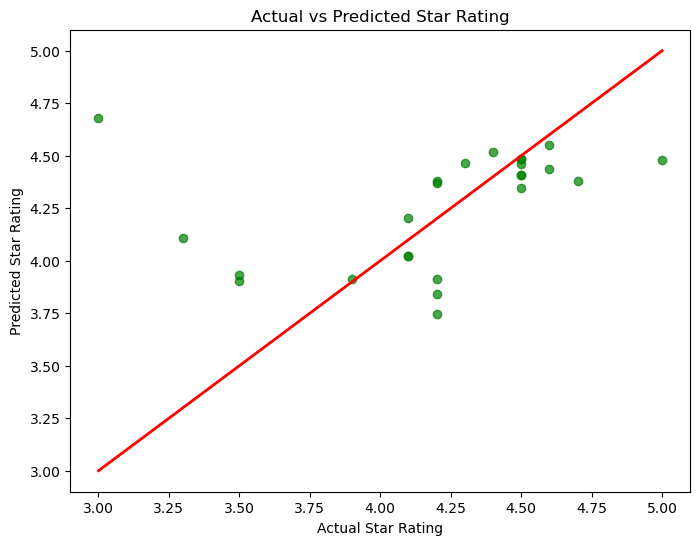

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.xlabel('Actual Star Rating')
plt.ylabel('Predicted Star Rating')
plt.title('Actual vs Predicted Star Rating')
# Add a reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()


## Regression Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# 3. Train a Regression Tree
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)  # you can tune max_depth
tree_model.fit(X_train, y_train)

# 4. Predictions
y_pred = tree_model.predict(X_test)

# 5. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.2777
R² Score: -0.3484


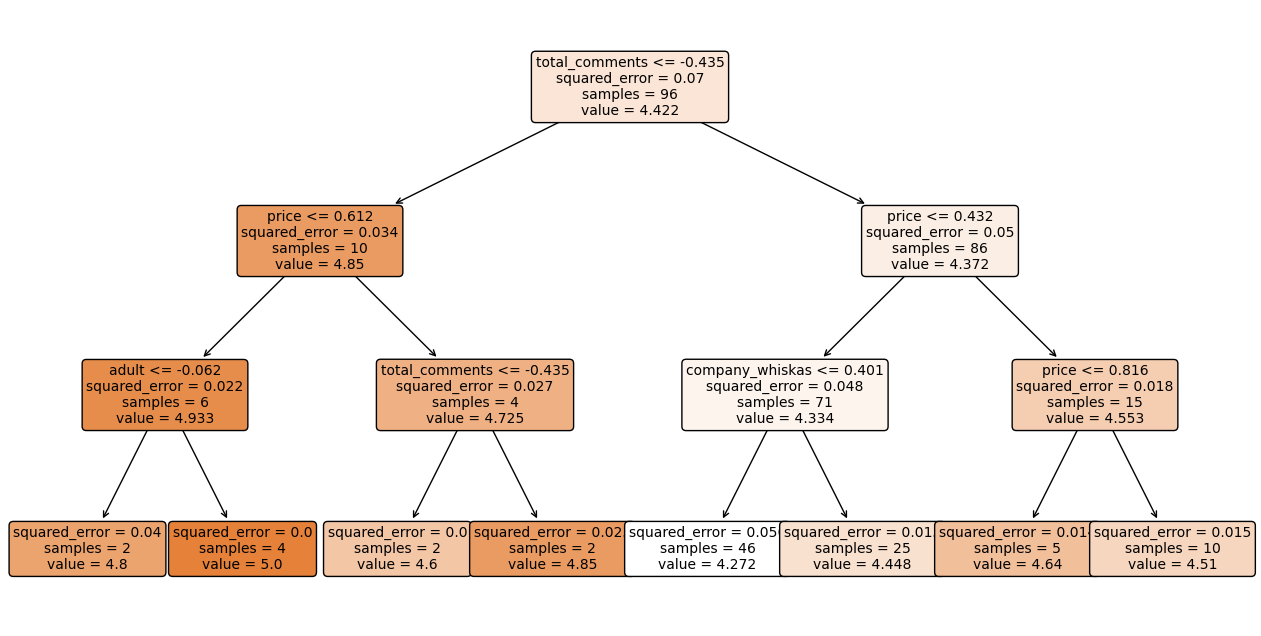

In [7]:
plt.figure(figsize=(16,8))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()


## RandomForest vs CatBoost


In [8]:
from sklearn.ensemble import RandomForestRegressor

# 3. Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [11]:
from catboost import CatBoostRegressor

# 4. CatBoost (silent mode)
cat_model = CatBoostRegressor(
    iterations=500,
    depth=8,
    learning_rate=0.1,
    random_state=42,
    verbose=0
)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

In [13]:
# 5. Evaluation
results = {
    "RandomForest": {
        "MSE": mean_squared_error(y_test, rf_pred),
        "R²": r2_score(y_test, rf_pred)
    },
    "CatBoost": {
        "MSE": mean_squared_error(y_test, cat_pred),
        "R²": r2_score(y_test, cat_pred)
    }
}

# Display results in a nice table
results_df = pd.DataFrame(results).T
print(results_df)

                   MSE        R²
RandomForest  0.234249 -0.137221
CatBoost      0.215931 -0.048288
